In [322]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import sklearn.preprocessing as preprocessing
from IPython.core.interactiveshell import InteractiveShell

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, SelectFromModel
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay
from sklearn.metrics import plot_roc_curve

from sklearn.metrics import ConfusionMatrixDisplay
import sklearn.metrics as metrics

InteractiveShell.ast_node_interactivity = 'all'

to_show = True
to_save = False
is_sample = False
is_sample = True
limit_rows = 1000

In [323]:
# This data cleaning part gets ideas from https://www.kaggle.com/apryor6/detailed-cleaning-visualization-python
# HAN YIKAI takes charge of feature 1-9
# official file
train_file = '../input/train_ver2.csv'
test_file = '../input/test_ver2.csv'

out_path = '../output/'


def save_df2file(data_frame: pd.DataFrame, name: str):
    data_frame.to_csv(f'{out_path}{name}.csv')

# sns.set(rc = {'figure.figsize':(20,18)})


In [324]:
# test_df = pd.read_csv(test_file,
#                       dtype={'sexo': str,
#                              'ind_nuevo': str,
#                              'ult_fec_cli_1t': str,
#                              'indext': str},
#                       # nrows=limit_rows,
#                       low_memory=False
#                       )

In [325]:
df = pd.read_csv(train_file,
                 dtype={'sexo': str,
                        'ind_nuevo': str,
                        'ult_fec_cli_1t': str,
                        'indext': str},
                 # nrows=limit_rows,
                 low_memory=False
                 )

# resample the data for saving memory and shuffle the dataset
if is_sample:
    df = df.sample(frac=0.01)

y_name_list = list(df.iloc[:, 24:].columns)
x_name_list = list(df.iloc[:, :24].columns)
# df = df[order]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136473 entries, 716072 to 142099
Data columns (total 48 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   fecha_dato             136473 non-null  object 
 1   ncodpers               136473 non-null  int64  
 2   ind_empleado           136184 non-null  object 
 3   pais_residencia        136184 non-null  object 
 4   sexo                   136183 non-null  object 
 5   age                    136473 non-null  object 
 6   fecha_alta             136184 non-null  object 
 7   ind_nuevo              136184 non-null  object 
 8   antiguedad             136473 non-null  object 
 9   indrel                 136184 non-null  float64
 10  ult_fec_cli_1t         237 non-null     object 
 11  indrel_1mes            134905 non-null  object 
 12  tiprel_1mes            134905 non-null  object 
 13  indresi                136184 non-null  object 
 14  indext                 136184 n

In [326]:
df.loc[:, y_name_list].isna().sum()

ind_ahor_fin_ult1      0
ind_aval_fin_ult1      0
ind_cco_fin_ult1       0
ind_cder_fin_ult1      0
ind_cno_fin_ult1       0
ind_ctju_fin_ult1      0
ind_ctma_fin_ult1      0
ind_ctop_fin_ult1      0
ind_ctpp_fin_ult1      0
ind_deco_fin_ult1      0
ind_deme_fin_ult1      0
ind_dela_fin_ult1      0
ind_ecue_fin_ult1      0
ind_fond_fin_ult1      0
ind_hip_fin_ult1       0
ind_plan_fin_ult1      0
ind_pres_fin_ult1      0
ind_reca_fin_ult1      0
ind_tjcr_fin_ult1      0
ind_valo_fin_ult1      0
ind_viv_fin_ult1       0
ind_nomina_ult1      144
ind_nom_pens_ult1    144
ind_recibo_ult1        0
dtype: int64

In [327]:
y_name_list

['ind_ahor_fin_ult1',
 'ind_aval_fin_ult1',
 'ind_cco_fin_ult1',
 'ind_cder_fin_ult1',
 'ind_cno_fin_ult1',
 'ind_ctju_fin_ult1',
 'ind_ctma_fin_ult1',
 'ind_ctop_fin_ult1',
 'ind_ctpp_fin_ult1',
 'ind_deco_fin_ult1',
 'ind_deme_fin_ult1',
 'ind_dela_fin_ult1',
 'ind_ecue_fin_ult1',
 'ind_fond_fin_ult1',
 'ind_hip_fin_ult1',
 'ind_plan_fin_ult1',
 'ind_pres_fin_ult1',
 'ind_reca_fin_ult1',
 'ind_tjcr_fin_ult1',
 'ind_valo_fin_ult1',
 'ind_viv_fin_ult1',
 'ind_nomina_ult1',
 'ind_nom_pens_ult1',
 'ind_recibo_ult1']

In [328]:
# 评估
def print_evaluation(y_true, y_pred):
    pass


In [329]:
# 复用函数

# 统计缺失值的列
def cal_loss(data):
    fil = data.iloc[:, :24].isnull().any()
    loss_column = fil[fil == True].index
    res = data.loc[:, loss_column].isnull().sum()
    print(res)

#
# def renew_df(base_df: pd.DataFrame):
#     new_df = base_df
#     base_df = df.copy(deep=True)
#     return new_df

In [330]:
# 删除y值空缺的行
df.drop(df[df['ind_nomina_ult1'].isnull()].index, inplace=True)

# 调整label的格式节省空间, 能节约2.1G 空间, 将近一半
df.loc[:, y_name_list] = df.loc[:, y_name_list].astype('uint8')
df.loc[:, y_name_list].value_counts(dropna=False)

/tmp/ipykernel_19543/3066333033.py:5: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, y_name_list] = df.loc[:, y_name_list].astype('uint8')


ind_ahor_fin_ult1  ind_aval_fin_ult1  ind_cco_fin_ult1  ind_cder_fin_ult1  ind_cno_fin_ult1  ind_ctju_fin_ult1  ind_ctma_fin_ult1  ind_ctop_fin_ult1  ind_ctpp_fin_ult1  ind_deco_fin_ult1  ind_deme_fin_ult1  ind_dela_fin_ult1  ind_ecue_fin_ult1  ind_fond_fin_ult1  ind_hip_fin_ult1  ind_plan_fin_ult1  ind_pres_fin_ult1  ind_reca_fin_ult1  ind_tjcr_fin_ult1  ind_valo_fin_ult1  ind_viv_fin_ult1  ind_nomina_ult1  ind_nom_pens_ult1  ind_recibo_ult1
0                  0                  1                 0                  0                 0                  0                  0                  0                  0                  0                  0                  0                  0                  0                 0                  0                  0                  0                  0                  0                 0                0                  0                  60635
                                      0                 0                  0                 0   

In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136329 entries, 716072 to 142099
Data columns (total 48 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   fecha_dato             136329 non-null  object 
 1   ncodpers               136329 non-null  int64  
 2   ind_empleado           136183 non-null  object 
 3   pais_residencia        136183 non-null  object 
 4   sexo                   136182 non-null  object 
 5   age                    136329 non-null  object 
 6   fecha_alta             136183 non-null  object 
 7   ind_nuevo              136183 non-null  object 
 8   antiguedad             136329 non-null  object 
 9   indrel                 136183 non-null  float64
 10  ult_fec_cli_1t         237 non-null     object 
 11  indrel_1mes            134904 non-null  object 
 12  tiprel_1mes            134904 non-null  object 
 13  indresi                136183 non-null  object 
 14  indext                 136183 n

In [332]:
# fecha_dato 日期
# ncodpers 客户代码
# ind_empleado 员工
# pais_residencia 国藉
# sexo 性别,
# age 年龄
# fecha_alta 注册日期,
# ind_nuevo 新的,
# antiguedad 古代,
# indrel 最后访问日期, 一个月indrel
# ult_fec_cli_1t  作为主要客户的日期
# indrel_1mes  1 (First/Primary customer), 2 (co-owner ),P (Potential),3 (former primary), 4(former co-owner)
# tiprel_1mes  月初客户关系类型 A (active), I (inactive), P (former customer 前客户),R (Potential 潜在客户)
# indresi 居住指数S (Yes) 银行和居住国相同 N (No) 不同国家
# indext  外国人指数, S 本国出生, N 非本国
# conyuemp 配偶指数, S 客户是员工配偶
# canal_entrada
# indfall
# tipodom
# cod_prov 省份编码
# nomprov 省份名称
# ind_actividad_cliente
# renta 家庭总收入
# segmento segmentation: 01 - VIP, 02 - Individuals 03 - college graduated

In [333]:
# cal_loss(df)

In [334]:
# 删除27734条空行, 所有全空
df.drop(df[df['ind_empleado'].isnull()].index, inplace=True)
# 删除全other的空行, 所有全空
df.drop(df[df['pais_residencia'] == 'others'].index, inplace=True)

In [335]:
# 缺失值很少的删除行
df.drop(df[df['sexo'].isnull()].index, inplace=True)
df.drop(df[df['tipodom'].isnull()].index, inplace=True)

In [336]:
# 缺失值很多的删除列
df.drop('ult_fec_cli_1t', axis=1, inplace=True)
df.drop('conyuemp', axis=1, inplace=True)

In [337]:
# 省份名称直接删除, 省份编码缺失值用-1填充
df.drop('nomprov', axis=1, inplace=True)
df.cod_prov.fillna(-1, inplace=True)

In [338]:
# df.loc[(df.ind_nomina_ult1.isna()) | (df.ind_nom_pens_ult1.isna()), y_name_list]

In [339]:
# df.loc[(df.ind_nomina_ult1.isna()) & (df.ind_nom_pens_ult1.isna()), y_name_list].sum(axis=1)

In [340]:
# (df.loc[:, y_name_list].sum(axis=1)==0).sum()

In [341]:
# df[df['indrel_1mes'].isna()].iloc[:, :df.shape[1] - 24]

In [342]:
# canal_entrada 用户加入渠道非常多162种 而且比较平衡, 还是用unknown填充, 考虑KNN填充
df.canal_entrada.value_counts()
df.canal_entrada.fillna('unknown', inplace=True)

KHE    40376
KAT    32511
KFC    31170
KHQ     5995
KFA     3987
       ...  
KEM        1
KCO        1
KBD        1
KFE        1
KCP        1
Name: canal_entrada, Length: 149, dtype: int64

In [343]:
df.renta

716072     112382.52
3911706     25455.24
4052549    102087.96
8547423     88364.73
284254           NaN
             ...    
2972494     99161.43
3010483    125177.16
7113655    120442.80
1021394     80309.79
142099           NaN
Name: renta, Length: 136182, dtype: float64

In [344]:
# renta 数值型填充
# sns.scatterplot(df.renta, df.renta.value_counts())
# df.renta.plot.scatter(x='renta', y=df.renta.value_counts())

In [345]:
# TODO
df.renta.fillna(df.renta.mean(), inplace=True)

In [346]:
df.indrel_1mes.fillna('unknown', inplace=True)
df.tiprel_1mes.fillna('unknown', inplace=True)

In [347]:
# 23. segmento : 01 - VIP, 02 - 个人 03 - 大学毕业
df.segmento.fillna('00', inplace=True)

In [348]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136182 entries, 716072 to 142099
Data columns (total 45 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   fecha_dato             136182 non-null  object 
 1   ncodpers               136182 non-null  int64  
 2   ind_empleado           136182 non-null  object 
 3   pais_residencia        136182 non-null  object 
 4   sexo                   136182 non-null  object 
 5   age                    136182 non-null  object 
 6   fecha_alta             136182 non-null  object 
 7   ind_nuevo              136182 non-null  object 
 8   antiguedad             136182 non-null  object 
 9   indrel                 136182 non-null  float64
 10  indrel_1mes            136182 non-null  object 
 11  tiprel_1mes            136182 non-null  object 
 12  indresi                136182 non-null  object 
 13  indext                 136182 non-null  object 
 14  canal_entrada          136182 n

In [349]:
cal_loss(df)

Series([], dtype: float64)


# 编码

In [350]:
# 0. fecha_dato 日期
# df.fecha_dato.value_counts(dropna=False).plot(kind='bar')
# 1. ncodpers 客户代码, 弃用
# df.ncodpers.value_counts(dropna=False)

In [351]:
# 日期和客户代码删除
df.drop(['fecha_dato', 'ncodpers'], axis=1, inplace=True)

In [352]:
def label_enc(data):
    label_enc = preprocessing.LabelEncoder()  #获取一个LabelEncoder
    # label_enc = preprocessing.OrdinalEncoder()  #获取一个LabelEncoder
    label_data = label_enc.fit_transform(data)
    return np.array(label_data).reshape(-1, 1)


# def concat_encoder(df):
#     data = pd.concat([data, pd.DataFrame(arrays, columns=names)],axis=1)
#     data = data.drop(['hour'],axis=1)
#     return df

# 对单列编码
def oh_enc(data):
    label_data = label_enc(data)
    # 2. 再用onehot
    oh_enc = preprocessing.OneHotEncoder()
    name_list = []
    for i in range(label_data.classes_.shape[0]):
        name = f'{data.name}_{i}'
        name_list.append(name)
    # 给fit_transform传递的X一定要是 2D的，即（samples，features），否则会报错`
    onehot_data = oh_enc.fit_transform(label_data)
    # 转成numpy array格式
    onehot_data = onehot_data.toarray()
    enc_df = pd.DataFrame(onehot_data, columns=name_list)
    return enc_df

In [353]:

# 2. 5 ind_empleado 员工指标,
# 树模型直接不处理
# A active 活跃, B ex employed 前雇员, F filial 子女, N not employee 非雇员, P pasive 被动, 目前没有寻找新工作, 但是对新工作持开放态度

# df.ind_empleado.value_counts(dropna=False)
# enc_array = label_enc(df.ind_empleado)
def get_ordinal_name(data) -> list:
    return [f'{data.name}_enc']


def get_onehot_name(data) -> list:
    length = data.unique().shape[0]
    l = []
    for i in range(length):
        l.append(f'{data.name}_oh_{i}')
    return l


def new_ordinal_df(data: pd.Series, array):
    name: list = get_ordinal_name(data)
    return pd.DataFrame(array, index=data.index, columns=name)


# TODO
def new_onehot_df(data: pd.Series, array):
    name: list = get_ordinal_name(data)
    return pd.DataFrame(array, index=data.index, columns=name)


# TODO
def show_value_counts(df, od_set: set, oh_set: set):
    df[get_ordinal_name(df.ind_empleado)].value_counts(dropna=False)


od_set = set()
oh_set = set()

In [354]:
l = get_onehot_name(df.ind_empleado)
e = get_ordinal_name(df.ind_empleado)
l
e

['ind_empleado_oh_0',
 'ind_empleado_oh_1',
 'ind_empleado_oh_2',
 'ind_empleado_oh_3']

['ind_empleado_enc']

In [355]:
# df.drop(get_ordinal_name(df.ind_empleado), axis=1, inplace=True)

In [356]:
# df[get_ordinal_name(df.ind_empleado)].value_counts()

df.ind_empleado.value_counts(dropna=False)

N    136098
A        28
B        28
F        28
Name: ind_empleado, dtype: int64

In [357]:
# 单列编码
# df = pd.concat([df, new_ordinal_df(df.ind_empleado, label_enc(df.ind_empleado))], axis=1)
# df[get_ordinal_name(df.ind_empleado)].value_counts(dropna=False)

# 用list收集, 统一进行编码处理
od_set.add(df.ind_empleado.name)

In [358]:
# 3. 118 pais_residencia 客户国籍 ES占比巨大
# 发现others国家的人所有数据都是others
# 继续处理
# Nan unknown
# TODO 计算占比
# df.pais_residencia.value_counts(dropna=False)
# df.pais_residencia.unique()

# 用others替换其他
df.loc[(df['pais_residencia'] != 'ES'), 'pais_residencia'] = 'others'

# df[df['pais_residencia']=='ES'].sum()
df.pais_residencia.value_counts(dropna=False)

od_set.add(df.pais_residencia.name)

ES        135536
others       646
Name: pais_residencia, dtype: int64

In [359]:
# 4. sexo
# Nan = unknown
# 无序类别
df.sexo.value_counts(dropna=False)
od_set.add(df.sexo.name)

V    74156
H    62026
Name: sexo, dtype: int64

In [360]:
df.age = df.age.astype('int8')

In [361]:
# 5. age 年龄
# 清洗>100的异常值
# df.age.value_counts(dropna=False)
low_age = df.loc[df.age < 16, 'age']
low_age.mean()

# df['age'].unique()

11.059782608695652

In [362]:
df.fecha_alta.value_counts(dropna=False)

2014-10-03    534
2014-07-28    510
2014-08-04    476
2013-10-14    427
2013-08-03    329
             ... 
2007-12-08      1
2001-07-15      1
2016-04-30      1
1997-08-14      1
1996-08-20      1
Name: fecha_alta, Length: 6290, dtype: int64

In [363]:
pd.DatetimeIndex(df["fecha_alta"]).month.value_counts()

10    22155
9     16074
11    15293
7     14711
8     13618
12    10137
1      8296
2      7712
3      7475
4      7303
5      6760
6      6648
Name: fecha_alta, dtype: int64

In [364]:
temp = df.fecha_alta.astype('datetime64[M]')
temp.value_counts()

2013-10-01    3836
2014-10-01    3353
2012-10-01    3052
2014-09-01    2960
2011-10-01    2685
              ... 
1995-08-01      32
1995-04-01      21
1995-03-01      19
1995-02-01      15
1995-01-01      11
Name: fecha_alta, Length: 257, dtype: int64

In [365]:
df.antiguedad.value_counts(dropna=False)
od_set.add(df.antiguedad.name)

     12    2431
     21    2127
     10    2067
     23    1766
     45    1698
           ... 
    252       5
    254       2
-999999       2
    255       2
    256       1
Name: antiguedad, Length: 258, dtype: int64

In [366]:
df.fecha_alta.info()

<class 'pandas.core.series.Series'>
Int64Index: 136182 entries, 716072 to 142099
Series name: fecha_alta
Non-Null Count   Dtype 
--------------   ----- 
136182 non-null  object
dtypes: object(1)
memory usage: 2.1+ MB


In [367]:
x = pd.to_datetime(df.fecha_alta)
x.info()

<class 'pandas.core.series.Series'>
Int64Index: 136182 entries, 716072 to 142099
Series name: fecha_alta
Non-Null Count   Dtype         
--------------   -----         
136182 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.1 MB


In [368]:
# 6.fecha_alta 客户首次签订合同的日期, 可以用距今差值表示, 总结成月份, 然后判断和 antiguedad客户资历的关系
df.antiguedad.value_counts(dropna=False)
df.antiguedad.info()

# TODO 暂时先删除
df.drop('fecha_alta', inplace=True, axis=1)
# df.fecha_alta.isnull().sum()
# months_active = df.loc[df["ind_nuevo"].isnull(), :].groupby("ncodpers", sort=False).size()
# months_active.max()

     12    2431
     21    2127
     10    2067
     23    1766
     45    1698
           ... 
    252       5
    254       2
-999999       2
    255       2
    256       1
Name: antiguedad, Length: 258, dtype: int64

<class 'pandas.core.series.Series'>
Int64Index: 136182 entries, 716072 to 142099
Series name: antiguedad
Non-Null Count   Dtype 
--------------   ----- 
136182 non-null  object
dtypes: object(1)
memory usage: 2.1+ MB


In [369]:

# 7.ind_nuevo 新客户指数 2. 如果是6个月内注册的客户, 则为1
df.ind_nuevo = df.ind_nuevo.astype('int8')
df.ind_nuevo.value_counts(dropna=False)

od_set.add(df.ind_nuevo.name)

0    128001
1      8181
Name: ind_nuevo, dtype: int64

In [370]:
# 8. antiguedad 客户资历, 单位是月
df.antiguedad.value_counts(dropna=False)
od_set.add(df.antiguedad.name)

     12    2431
     21    2127
     10    2067
     23    1766
     45    1698
           ... 
    252       5
    254       2
-999999       2
    255       2
    256       1
Name: antiguedad, Length: 258, dtype: int64

In [371]:
# 6,7,8 缺失值数量相等已经删除

In [372]:
# 9.indrel  2:  1表示primary, 99表示当月primary,但不是月末?
# Nan =unknown
# one-hot label编码?
df.indrel = df.indrel.astype('int8')
df.indrel.value_counts(dropna=False)
od_set.add(df.indrel.name)

1     135945
99       237
Name: indrel, dtype: int64

In [373]:
# 10. ult_fec_cli_1t 作为主要客户的日期
# 缺失值太多, 丢弃
# df.ult_fec_cli_1t.value_counts(dropna=False)
# df.ult_fec_cli_1t.isnull().sum()

In [374]:
# df.replace('unknown', -2, inplace=True)
# df.replace('P', -3, inplace=True)
# 必须先修改类型, 不然replace匹配不上
# df.indrel_1mes = df.indrel_1mes.astype('float')
df.indrel_1mes.replace({'1.0': '1', '2.0': '2', '3.0': '3', '4.0': '4'}, inplace=True)  # 不同key用不同value替换
df.indrel_1mes.value_counts(dropna=False)
od_set.add(df.indrel_1mes.name)

1          134825
unknown      1279
3              58
P              10
2               7
4               3
Name: indrel_1mes, dtype: int64

In [375]:
# 12.tiprel_1mes 月初客户关系类型 A (active), I (inactive), P (former customer 前客户),R (Potential 潜在客户)
# Nan = unknown
# label 编码
df.tiprel_1mes.value_counts(dropna=False)
od_set.add(df.tiprel_1mes.name)

I          73235
A          61597
unknown     1279
P             61
R              9
N              1
Name: tiprel_1mes, dtype: int64

In [376]:
# 13. indresi 居住指数S (Yes) 银行和居住国相同 N (No) 不同国家
# label编码, S=1, N=0
df.indresi.value_counts(dropna=False)
od_set.add(df.indresi.name)


S    135536
N       646
Name: indresi, dtype: int64

In [377]:
# 14. indext 外国人指数, S 本国出生, N 非本国
# label 编码
df.indext.value_counts(dropna=False)
od_set.add(df.indext.name)


N    129669
S      6513
Name: indext, dtype: int64

In [378]:
# 15. conyuemp 配偶指数, S 客户是员工配偶
# 缺失太多, 删除列
# df.conyuemp.value_counts(dropna=False)

In [379]:
# 16. canal_entrada	客户渠道 (拉新渠道)
# Nan = unknown, 占比小于3%都是other
# 用占比, 占比低的作为others
df.canal_entrada.value_counts(dropna=False)
# df.canal_entrada.isnull().sum()
# print(100 * round(df.canal_entrada.value_counts(dropna=False) / df.shape[0], 8))
od_set.add(df.canal_entrada.name)

KHE    40376
KAT    32511
KFC    31170
KHQ     5995
KFA     3987
       ...  
KEM        1
KCO        1
KBD        1
KFE        1
KCP        1
Name: canal_entrada, Length: 150, dtype: int64

In [380]:
# 17. indfall 已故索引 N/S
df.indfall.value_counts(dropna=False)
od_set.add(df.indfall.name)


N    135836
S       346
Name: indfall, dtype: int64

In [381]:
# 18. tipodom 地址类型. 1, primary address 弃用
# Nan dropna
# 没有区分度, 删除列
# label编码
df.tipodom.value_counts(dropna=False)
df.drop('tipodom', axis=1, inplace=True)

1.0    136182
Name: tipodom, dtype: int64

In [382]:
# 19.cod_prov 省份编码
# 转成int
# Nan = 0?
# number
df.cod_prov = df.cod_prov.astype('int8')
df.cod_prov.value_counts(dropna=False)
od_set.add(df.cod_prov.name)


 28    44255
 8     12862
 46     6925
 41     6017
 15     4246
 30     3915
 29     3566
 50     3381
 3      3123
 11     2848
 36     2816
 33     2621
 35     2430
 47     2391
 6      1937
 48     1872
 45     1842
 18     1740
 37     1568
 39     1547
 14     1436
 7      1274
 10     1251
 13     1236
 21     1219
 2      1189
 12     1040
 43     1029
 9       936
 17      886
 31      882
 26      866
 27      823
 24      822
 25      804
 32      793
 20      734
 38      683
 23      670
 19      659
-1       646
 4       586
 16      573
 34      525
 49      515
 40      454
 22      407
 5       391
 1       385
 44      245
 42      176
 52       84
 51       61
Name: cod_prov, dtype: int64

In [383]:
# 20. nomprov 省份名称 删除
# df.nomprov.value_counts(dropna=False)

In [384]:
# 21. ind_actividad_cliente	活跃指数 1, active customer; 0, inactive customer)
df.ind_actividad_cliente = df.ind_actividad_cliente.astype('int8')
df.ind_actividad_cliente.value_counts(dropna=False)
od_set.add(df.ind_actividad_cliente.name)


0    74230
1    61952
Name: ind_actividad_cliente, dtype: int64

In [385]:
df.renta.max()

28894395.51

In [386]:
df.renta.min()

2336.01

In [387]:
df.renta = round(df.renta)
df.renta = df.renta.astype('int32')

In [388]:
# 23. segmento : 01 - VIP, 02 - 个人 03 - 大学毕业
# Nan = unknown
# ordinal 编码
df.segmento.value_counts()
od_set.add(df.segmento.name)


02 - PARTICULARES     79670
03 - UNIVERSITARIO    49292
01 - TOP               5527
00                     1693
Name: segmento, dtype: int64

In [389]:
# 未编码的列, 就是数值特征
set(df.columns) - od_set - oh_set - set(y_name_list)

{'age', 'renta'}

In [390]:
df.age.sum()

5471845

In [391]:
scaler = preprocessing.StandardScaler()
data = np.array(df.age).reshape(-1, 1)

tmp = scaler.fit_transform(data)

In [392]:
# tmp
df.age.mean()

40.180383604294256

In [393]:
df.head()

,ind_empleado,pais_residencia,sexo,age,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,indresi,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
716072,N,ES,H,41,0,85,1,1,A,S,...,0,0,0,0,0,0,0,1,1,1
3911706,N,ES,H,53,0,60,1,1,I,S,...,0,0,0,0,0,0,0,0,0,0
4052549,N,ES,V,50,0,179,1,1,A,S,...,0,0,0,0,0,0,0,0,0,0
8547423,N,ES,V,35,0,151,1,1,A,S,...,0,0,0,0,0,0,0,0,0,0
284254,N,ES,H,33,0,16,1,1,A,S,...,0,0,0,0,0,0,0,0,0,0


In [394]:
df.iloc[2, :]

ind_empleado                             N
pais_residencia                         ES
sexo                                     V
age                                     50
ind_nuevo                                0
antiguedad                             179
indrel                                   1
indrel_1mes                              1
tiprel_1mes                              A
indresi                                  S
indext                                   N
canal_entrada                          KAT
indfall                                  N
cod_prov                                28
ind_actividad_cliente                    1
renta                               102088
segmento                 02 - PARTICULARES
ind_ahor_fin_ult1                        0
ind_aval_fin_ult1                        0
ind_cco_fin_ult1                         1
ind_cder_fin_ult1                        0
ind_cno_fin_ult1                         0
ind_ctju_fin_ult1                        0
ind_ctma_fi

In [395]:
round(tmp.mean())

0

In [396]:
np.std(df.age)

17.2047644656388

In [397]:
df.age.sum() - tmp.sum()

5471845.0

In [398]:
df.age.shape

(136182,)

In [399]:
np.array([df.age]).shape

(1, 136182)

In [400]:
# 编码流程
len(od_set)


15

In [401]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136182 entries, 716072 to 142099
Data columns (total 41 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   ind_empleado           136182 non-null  object
 1   pais_residencia        136182 non-null  object
 2   sexo                   136182 non-null  object
 3   age                    136182 non-null  int8  
 4   ind_nuevo              136182 non-null  int8  
 5   antiguedad             136182 non-null  object
 6   indrel                 136182 non-null  int8  
 7   indrel_1mes            136182 non-null  object
 8   tiprel_1mes            136182 non-null  object
 9   indresi                136182 non-null  object
 10  indext                 136182 non-null  object
 11  canal_entrada          136182 non-null  object
 12  indfall                136182 non-null  object
 13  cod_prov               136182 non-null  int8  
 14  ind_actividad_cliente  136182 non-null  int8  


In [402]:
finished = []
for name in od_set:
    print(name)
    df = pd.concat([df, new_ordinal_df(df[name], label_enc(df[name]))], axis=1)
    finished.append(name)
df.drop(finished, inplace=True, axis=1)


indrel_1mes
indfall
tiprel_1mes
cod_prov
sexo
segmento
indrel
pais_residencia
ind_empleado
indresi
indext
canal_entrada
ind_actividad_cliente
antiguedad
ind_nuevo


In [403]:
X = df.drop(y_name_list, axis=1)
X

,age,renta,indrel_1mes_enc,indfall_enc,tiprel_1mes_enc,cod_prov_enc,sexo_enc,segmento_enc,indrel_enc,pais_residencia_enc,ind_empleado_enc,indresi_enc,indext_enc,canal_entrada_enc,ind_actividad_cliente_enc,antiguedad_enc,ind_nuevo_enc
716072,41,112383,0,0,0,28,0,2,0,0,3,1,0,114,1,85,0
3911706,53,25455,0,0,1,3,0,2,0,0,3,1,0,114,0,60,0
4052549,50,102088,0,0,0,28,1,2,0,0,3,1,0,23,1,179,0
8547423,35,88365,0,0,0,50,1,2,0,0,3,1,0,5,1,151,0
284254,33,133685,0,0,0,8,0,2,0,0,3,1,0,114,1,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2972494,50,99161,0,0,1,28,1,2,0,0,3,1,0,23,0,197,0
3010483,40,125177,0,0,1,46,0,2,0,0,3,1,0,114,0,104,0
7113655,55,120443,0,0,0,28,0,2,0,0,3,1,0,23,1,119,0
1021394,21,80310,0,0,1,35,0,3,0,0,3,1,0,139,0,9,0


In [404]:
y = df.loc[:, y_name_list]
y

,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
716072,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
3911706,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4052549,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8547423,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
284254,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2972494,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3010483,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7113655,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,1,1,1
1021394,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 模型

In [405]:


Xtrain, Xvalidation, Ytrain, Yvalidation = train_test_split(X, y, test_size=0.3)

In [406]:
Xtrain

,age,renta,indrel_1mes_enc,indfall_enc,tiprel_1mes_enc,cod_prov_enc,sexo_enc,segmento_enc,indrel_enc,pais_residencia_enc,ind_empleado_enc,indresi_enc,indext_enc,canal_entrada_enc,ind_actividad_cliente_enc,antiguedad_enc,ind_nuevo_enc
1192421,23,421534,0,0,1,28,0,3,0,0,3,1,0,139,0,33,0
10972822,46,133685,0,0,0,39,1,2,0,0,3,1,0,144,1,5,1
13389639,22,133685,0,0,1,28,0,3,0,0,3,1,0,147,0,8,0
9230298,33,133685,5,0,5,39,0,0,0,0,3,1,0,149,1,0,1
7451646,51,184463,0,0,0,8,1,2,0,0,3,1,0,23,1,244,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11638090,22,147939,0,0,1,30,0,3,0,0,3,1,0,139,0,28,0
12113070,51,133685,0,0,0,0,0,1,0,1,3,0,0,114,1,192,0
13035678,57,235048,0,0,0,28,0,2,0,0,3,1,0,23,1,241,0
10672416,26,92410,0,0,0,11,1,3,0,0,3,1,0,139,1,39,0


In [407]:
Ytrain

,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
1192421,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10972822,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13389639,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9230298,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7451646,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11638090,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12113070,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
13035678,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10672416,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [412]:
rfc = RandomForestClassifier(random_state=0, n_jobs=18)
rfc = rfc.fit(Xtrain, Ytrain)
y_pred = rfc.predict(Xvalidation)


In [413]:
Yvalidation.shape
y_pred.shape

(40855, 24)

(40855, 24)

In [428]:
auc_score = metrics.roc_auc_score(Yvalidation, y_pred,average='micro')  #验证集上的auc值
auc_score


0.743979774413724

In [419]:
y_pred.ravel()

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [429]:
fpr, tpr, thresholds = metrics.roc_curve(np.array(Yvalidation).ravel(), y_pred.ravel())
auc = metrics.auc(fpr, tpr)
auc

0.743979774413724

In [437]:
np.array(Yvalidation).ravel().shape

(980520,)

In [435]:
fpr.shape
tpr.shape
thresholds.shape

(3,)

(3,)

(3,)

In [434]:
fpr

array([0.        , 0.01272586, 1.        ])

(-0.01, 1.02)

(-0.01, 1.02)

([<matplotlib.axis.XTick at 0x7fea149b92a0>,
 [Text(0.0, 0, '0.0'),
  Text(0.1, 0, '0.1'),
  Text(0.2, 0, '0.2'),
  Text(0.30000000000000004, 0, '0.3'),
  Text(0.4, 0, '0.4'),
  Text(0.5, 0, '0.5'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.7000000000000001, 0, '0.7'),
  Text(0.8, 0, '0.8'),
  Text(0.9, 0, '0.9'),
  Text(1.0, 0, '1.0')])

([<matplotlib.axis.YTick at 0x7fea149bb160>,
 [Text(0, 0.0, '0.0'),
  Text(0, 0.1, '0.1'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5, '0.5'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.7000000000000001, '0.7'),
  Text(0, 0.8, '0.8'),
  Text(0, 0.9, '0.9'),
  Text(0, 1.0, '1.0')])

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

/tmp/ipykernel_19543/439308920.py:9: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, ls=':')


Text(0.5, 1.0, 'ROC')

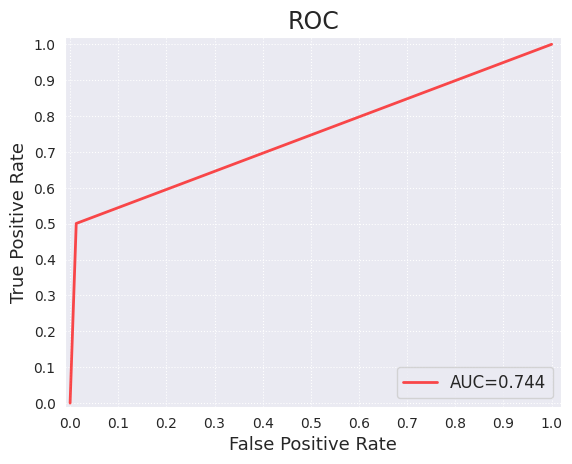

In [436]:
plt.plot(fpr, tpr, c = 'r', lw = 2, alpha = 0.7, label = u'AUC=%.3f' % auc)
# plt.plot((0, 1), (0, 1), c = '#808080', lw = 1, ls = '--', alpha = 0.7)
plt.xlim((-0.01, 1.02))
plt.ylim((-0.01, 1.02))
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.grid(b=True, ls=':')
plt.legend(loc='lower right', fancybox=True, framealpha=0.8, fontsize=12)
plt.title(u'ROC', fontsize=17)
plt.show()


In [ ]:

#多模型比较：
models = [('Logit', LogisticRegression(max_iter=5000)),
          ('KNN', KNeighborsClassifier()),
          ('SVM', SVC(probability=True)),
          ('GNB', GaussianNB()),
          ('DT', DecisionTreeClassifier(random_state=0)),
          ('RF', RandomForestClassifier(max_depth=2, random_state=0))]

#循环训练模型
results = []
roc_ = []
for name, model in models:
    clf = model.fit(X_train, y_train)
    pred_proba = clf.predict_proba(X_test)
    y_prob = pred_proba[:, 1]
    fpr, tpr, roc_auc, Optimal_threshold, optimal_point = ROC(y_test, y_prob)
    Accuracy, Sensitivity, Specificity = calculate_metric(y_test, y_prob, optimal_threshold)
    result = [Optimal_threshold, Accuracy, Sensitivity, Specificity, roc_auc, name]
    results.append(result)


In [450]:
def print_evaluation(y_true, y_pred, target_names=None, average='micro'):


    acc = metrics.accuracy_score(y_true, y_pred)
    report = classification_report(y_true, y_pred)

    fpr, tpr, thresholds = metrics.roc_curve(np.array(y_true).ravel(), y_pred.ravel())
    auc = metrics.auc(fpr, tpr)
    # svc_disp = plot_roc_curve(rfc, Xvalidation, y_pred)
    # plt.show()
    confusion_mat = metrics.multilabel_confusion_matrix(y_true, y_pred)
    # ConfusionMatrixDisplay.from_predictions(
    #     y_true, predicted_labels, labels=lp_model.classes_
    # )

    # precision = metrics.precision_score(y_true, y_pred, average=average)
    # metrics.recall_score(y_true, y_pred, average=average)
    # metrics.f1_score(y_true, y_pred, average=average)

    # 统一precision+recall+f1
    prf = metrics.precision_recall_fscore_support(y_true, y_pred, average=average)
    hamming = metrics.hamming_loss(y_true, y_pred)
    # kappa不支持多标签
    # kappa = metrics.cohen_kappa_score(y_true, y_pred)
    # sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, robust=True)
    print()
    # print(f"acc \n{acc}")
    # print(f"report \n{report}")
    # print(f'precision_recall_fscore_support\n{prf}\n')
    # print(f'multilabel_confusion_matrix\n{confusion_mat}')
    # print(f'auc\n{auc}')
    # print(f'hamming\n{hamming}\n')
    # print(f'kappa\n{kappa}\n')
    print(f'')

def plot_auc():
    plt.plot(fpr, tpr, c = 'r', lw = 2, alpha = 0.7, label = u'AUC=%.3f' % auc)
    # plt.plot((0, 1), (0, 1), c = '#808080', lw = 1, ls = '--', alpha = 0.7)
    plt.xlim((-0.01, 1.02))
    plt.ylim((-0.01, 1.02))
    plt.xticks(np.arange(0, 1.1, 0.1))
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.xlabel('False Positive Rate', fontsize=13)
    plt.ylabel('True Positive Rate', fontsize=13)
    plt.grid(b=True, ls=':')
    plt.legend(loc='lower right', fancybox=True, framealpha=0.8, fontsize=12)
    plt.title('ROC', fontsize=17)
    plt.show()
print_evaluation(Yvalidation, y_pred, average='micro')


/home/lucas/anaconda3/envs/ML/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lucas/anaconda3/envs/ML/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lucas/anaconda3/envs/ML/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [454]:
confusion_mat = metrics.multilabel_confusion_matrix(Yvalidation, y_pred)
ConfusionMatrixDisplay.from_predictions(
    Yvalidation,y_pred
    # , predicted_labels, labels=lp_model.classes_
)

ValueError: multilabel-indicator is not supported

In [3]:
from sklearn.preprocessing import MultiLabelBinarizer

MultiLabelBinarizer().fit_transform(y)

NameError: name 'y' is not defined

In [255]:
auc_score = metrics.roc_auc_score(Yvalidation, y_pred)  #验证集上的auc值


ValueError: Found array with dim 3. None expected <= 2.

In [252]:
roc = {label: [] for label in metrics.multi_class_series.unique()}
for label in multi_class_series.unique():
    selected_classifier.fit(train_set_dataframe, train_class == label)
    predictions_proba = selected_classifier.predict_proba(test_set_dataframe)
    roc[label] += roc_auc_score(test_class, predictions_proba[:, 1])

NameError: name 'multi_class_series' is not defined

In [303]:
metrics.multilabel_confusion_matrix(Yvalidation, y_pred)


array([[[40845,     0],
        [    3,     0]],

       [[40848,     0],
        [    0,     0]],

       [[ 7666,  6409],
        [ 4037, 22736]],

       [[40835,     0],
        [   13,     0]],

       [[37058,   474],
        [ 2798,   518]],

       [[40433,    19],
        [   16,   380]],

       [[40416,    28],
        [  376,    28]],

       [[33975,  1510],
        [ 3137,  2226]],

       [[38912,   170],
        [ 1573,   193]],

       [[40768,     2],
        [   76,     2]],

       [[40770,     3],
        [   73,     2]],

       [[38694,   367],
        [ 1286,   501]],

       [[36901,   548],
        [ 2677,   722]],

       [[40039,    36],
        [  715,    58]],

       [[40626,     4],
        [  216,     2]],

       [[40437,     9],
        [  384,    18]],

       [[40746,     7],
        [   78,    17]],

       [[38582,   177],
        [ 1921,   168]],

       [[38934,   127],
        [ 1677,   110]],

       [[39747,    72],
        [  954,    75]],



In [ ]:
# GBDT
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
# RF
rfc = RandomForestClassifier(random_state=0, n_jobs=18)

# XGBoost




In [ ]:
params = {
    'booster': 'gbtree',
    'objective': 'multi:softmax',  # 多分类的问题
    'num_class': len(y_name_list),  # 类别数，与 multisoftmax 并用
    'gamma': 0.1,  # 用于控制是否后剪枝的参数,越大越保守，一般0.1、0.2这样子。
    'max_depth': 12,  # 构建树的深度，越大越容易过拟合
    'lambda': 2,  # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
    'subsample': 0.7,  # 随机采样训练样本
    'colsample_bytree': 0.7,  # 生成树时进行的列采样
    'min_child_weight': 3,
    'silent': 1,  # 设置成1则没有运行信息输出，最好是设置为0.
    'eta': 0.007,  # 如同学习率
    'seed': 1000,
    'nthread': 4,  # cpu 线程数
}

In [288]:


classifiers = []

rfc = rfc.fit(Xtrain, Ytrain)
y_pred = rfc.predict(Xvalidation)

In [290]:
Yvalidation.shape

(40848, 24)

In [289]:
y_pred.shape

(40848, 24)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

<Figure size 2000x1000 with 0 Axes>

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

<Figure size 2000x1000 with 0 Axes>

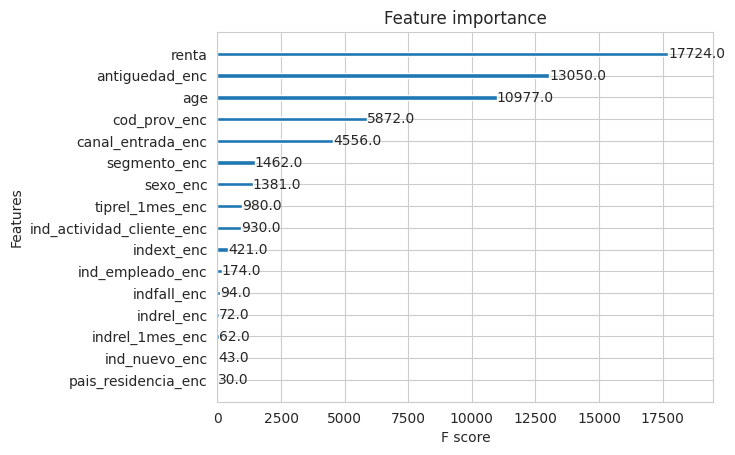

In [309]:

import xgboost
xb = xgboost.XGBClassifier()
xb.fit(Xtrain,Ytrain)


plt.figure(figsize=(20, 10))
xgboost.plot_importance(xb)
plt.show()

In [317]:
# fpr, tpr, thresholds  =  metrics.roc_auc_score(Yvalidation, y_pred, average='micro')
fpr, tpr, thresholds = metrics.roc_curve(Yvalidation.ravel(),y_pred.ravel())
# auc = metrics.auc(fpr, tpr)


AttributeError: 'DataFrame' object has no attribute 'to_array'

In [321]:
Yvalidation.shape
y_true.shape

(40848, 24)

(2, 3)

In [319]:
metrics.roc_auc_score(Yvalidation, y_true, average='micro')


ValueError: Found input variables with inconsistent numbers of samples: [40848, 2]

In [258]:
pd.DataFrame(y_pred)

ValueError: Must pass 2-d input. shape=(24, 40848, 2)

In [275]:
y_true = np.array([[0, 1, 1, 0], [0, 1, 1, 0]])
y_scores = np.array([[9, 0, 1, 0], [0, 1, 1, 0]])
roc_auc_score(y_true, y_scores)

ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [299]:
t = np.array(
    [
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 0, 0]
    ]
)
p = np.array(
    [
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]
    ]
)
t.shape
p.shape
metrics.multilabel_confusion_matrix(t, p)

(5, 3)

(5, 3)

array([[[5, 0],
        [0, 0]],

       [[1, 0],
        [4, 0]],

       [[5, 0],
        [0, 0]]])

In [293]:
t.shape
p.shape

(2, 3)

(2, 3)